In [1]:
def draw_points(img, pts,radius = 10):
    #input: array of 4 coordinates
    #output: red dots on coordinate poins
    for (x,y) in pts:
        #print(x,y)
        img = cv2.circle(img, (x,y), radius = radius, color=(0, 0, 255), thickness=-1)

    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt



### Load chessboard img from two camera ###
img1 = cv2.imread(r'C:\Users\khan1\Desktop\Projective_transform\two_camera_homography\left01.jpg')
img2 = cv2.imread(r'C:\Users\khan1\Desktop\Projective_transform\two_camera_homography\left03.jpg')

plt.imshow(img1)
plt.title("Camera 1 img")
plt.show()

plt.imshow(img2)
plt.title("Camera 2 img")
plt.show()

grey1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
grey2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)


### find corners for each img ###
ret1, corners1 = cv2.findChessboardCorners(grey1, (9,6), None) # change (9,6) value based on image
ret2, corners2 = cv2.findChessboardCorners(grey2, (9,6), None)


### Estimate homography ###
H, status = cv2.findHomography(corners1, corners2)
print("Homography matrix between camera 1 and 2, H: ")
print(H)


# [warp-chessboard]
img1_warp = cv2.warpPerspective(img1, H, (img1.shape[1], img1.shape[0]))
# [warp-chessboard]

img_draw_warp = cv2.hconcat([img1_warp,img2])
plt.imshow(img_draw_warp)
plt.title("Desired chessboard view: wraped camera 1 view to camera 2 view")
plt.show()


### Show which points matched
corners1 = corners1.tolist()
corners1 = [a[0] for a in corners1]


# [compute-transformed-corners]
img_draw_matches = cv2.hconcat([img1, img2])
for i in range(len(corners1)):
    pt1 = np.array([corners1[i][0], corners1[i][1], 1])
    pt1 = pt1.reshape(3, 1)
    pt2 = np.dot(H, pt1)
    pt2 = pt2/pt2[2]
    end = (int(img1.shape[1] + pt2[0]), int(pt2[1]))
    COLORS = (np.random.randint(0,255), np.random.randint(0,255), np.random.randint(0,255))
    cv2.line(img_draw_matches, tuple([int(j) for j in corners1[i]]), end, COLORS, 2)
    
plt.imshow(cv2.cvtColor(img_draw_matches, cv2.COLOR_BGR2RGB))
plt.title("Matched points")
plt.show()

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

Homography matrix between camera 1 and 2, H: 
[[ 1.15459061e+00 -7.05674198e-01  4.31844880e+01]
 [ 3.69931849e-01  8.97014726e-01 -1.08350311e+02]
 [ 2.91862056e-05 -7.53829423e-04  1.00000000e+00]]


<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

### Camera Setup
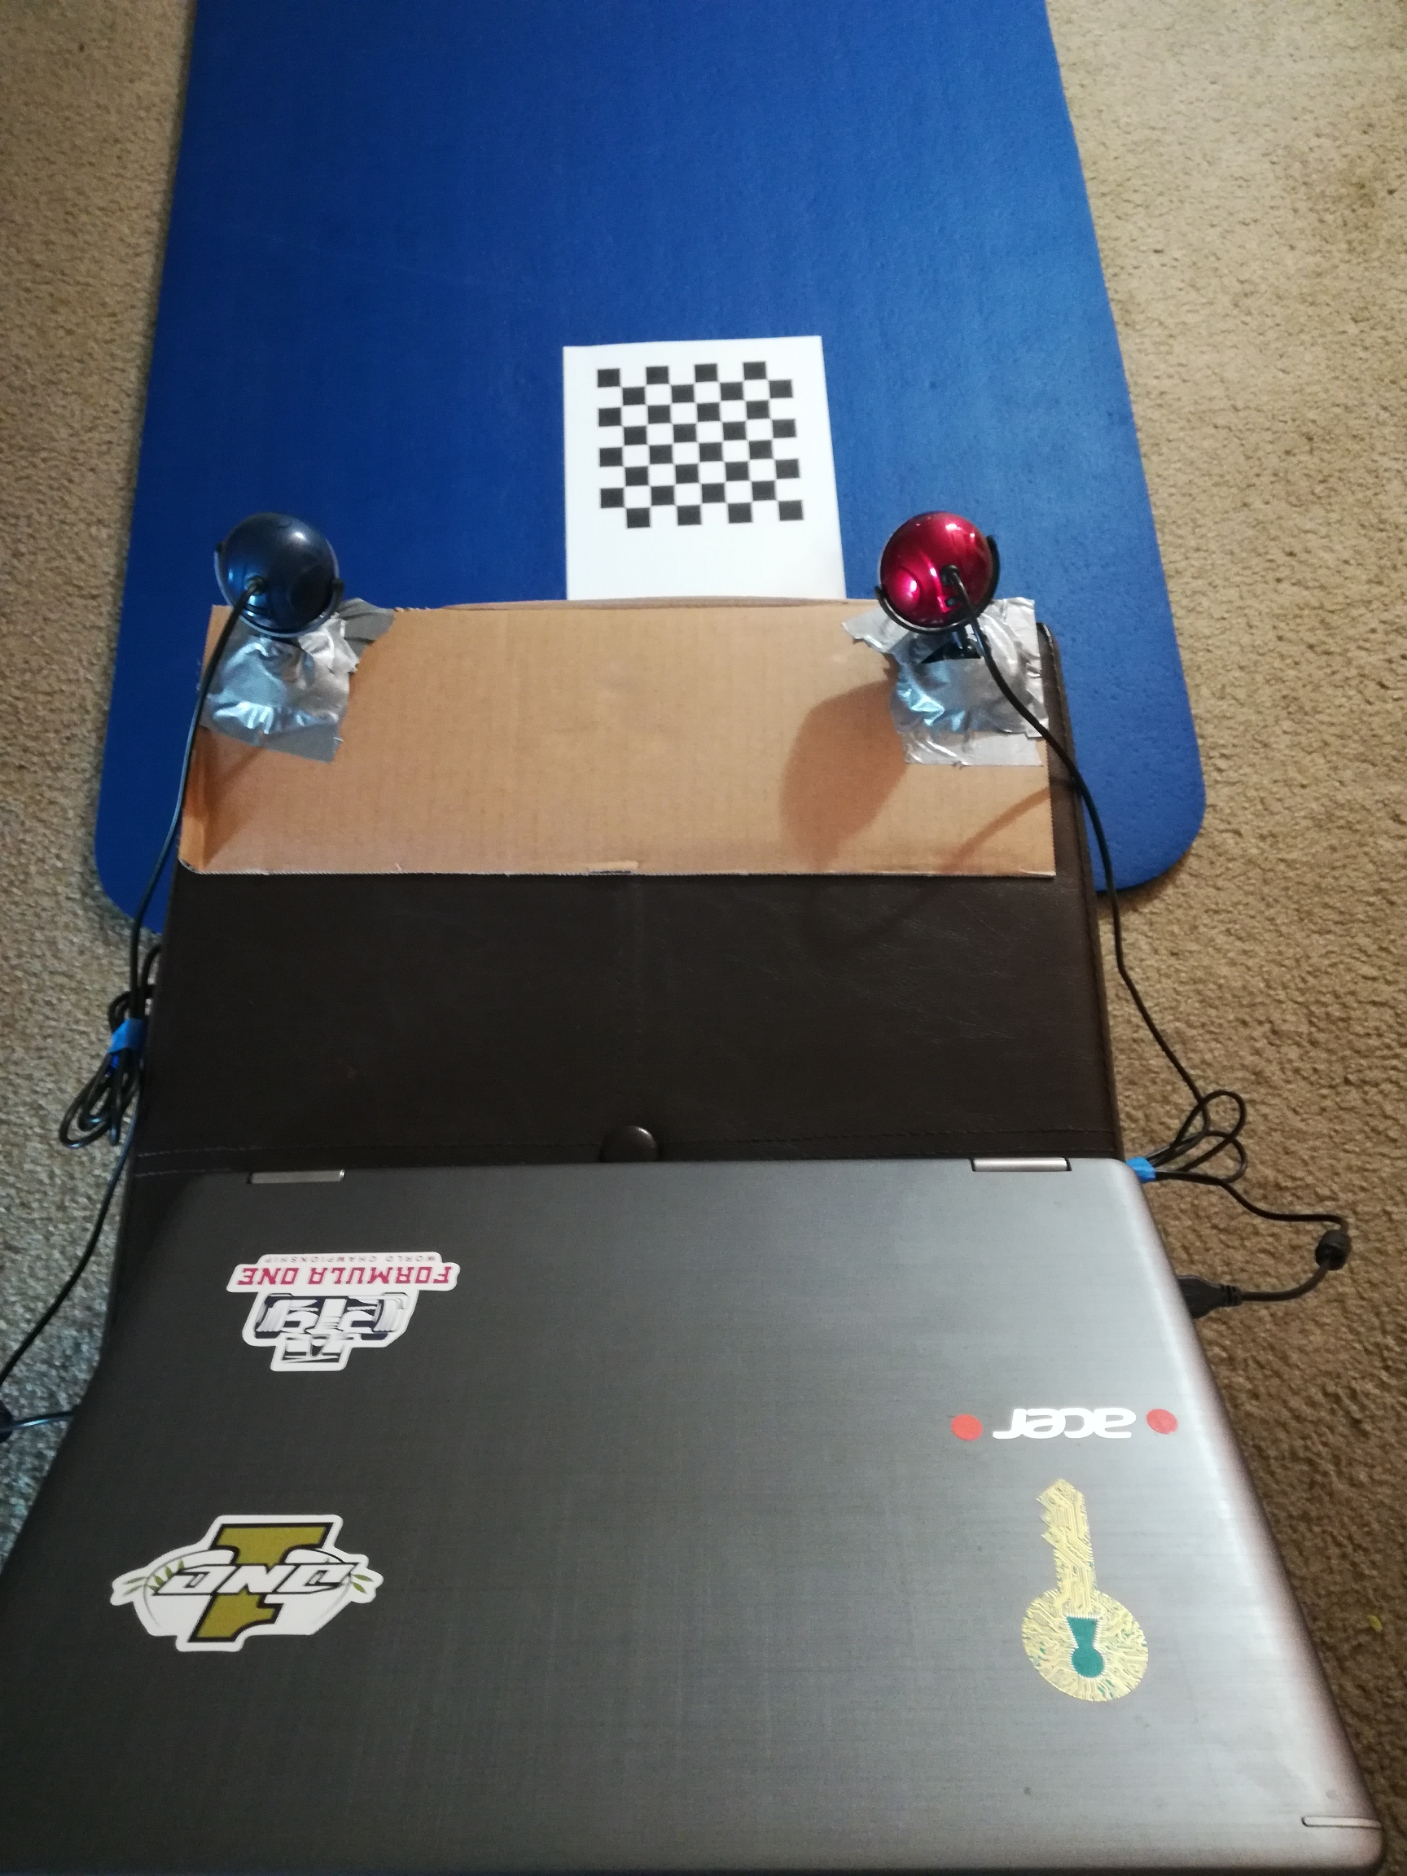
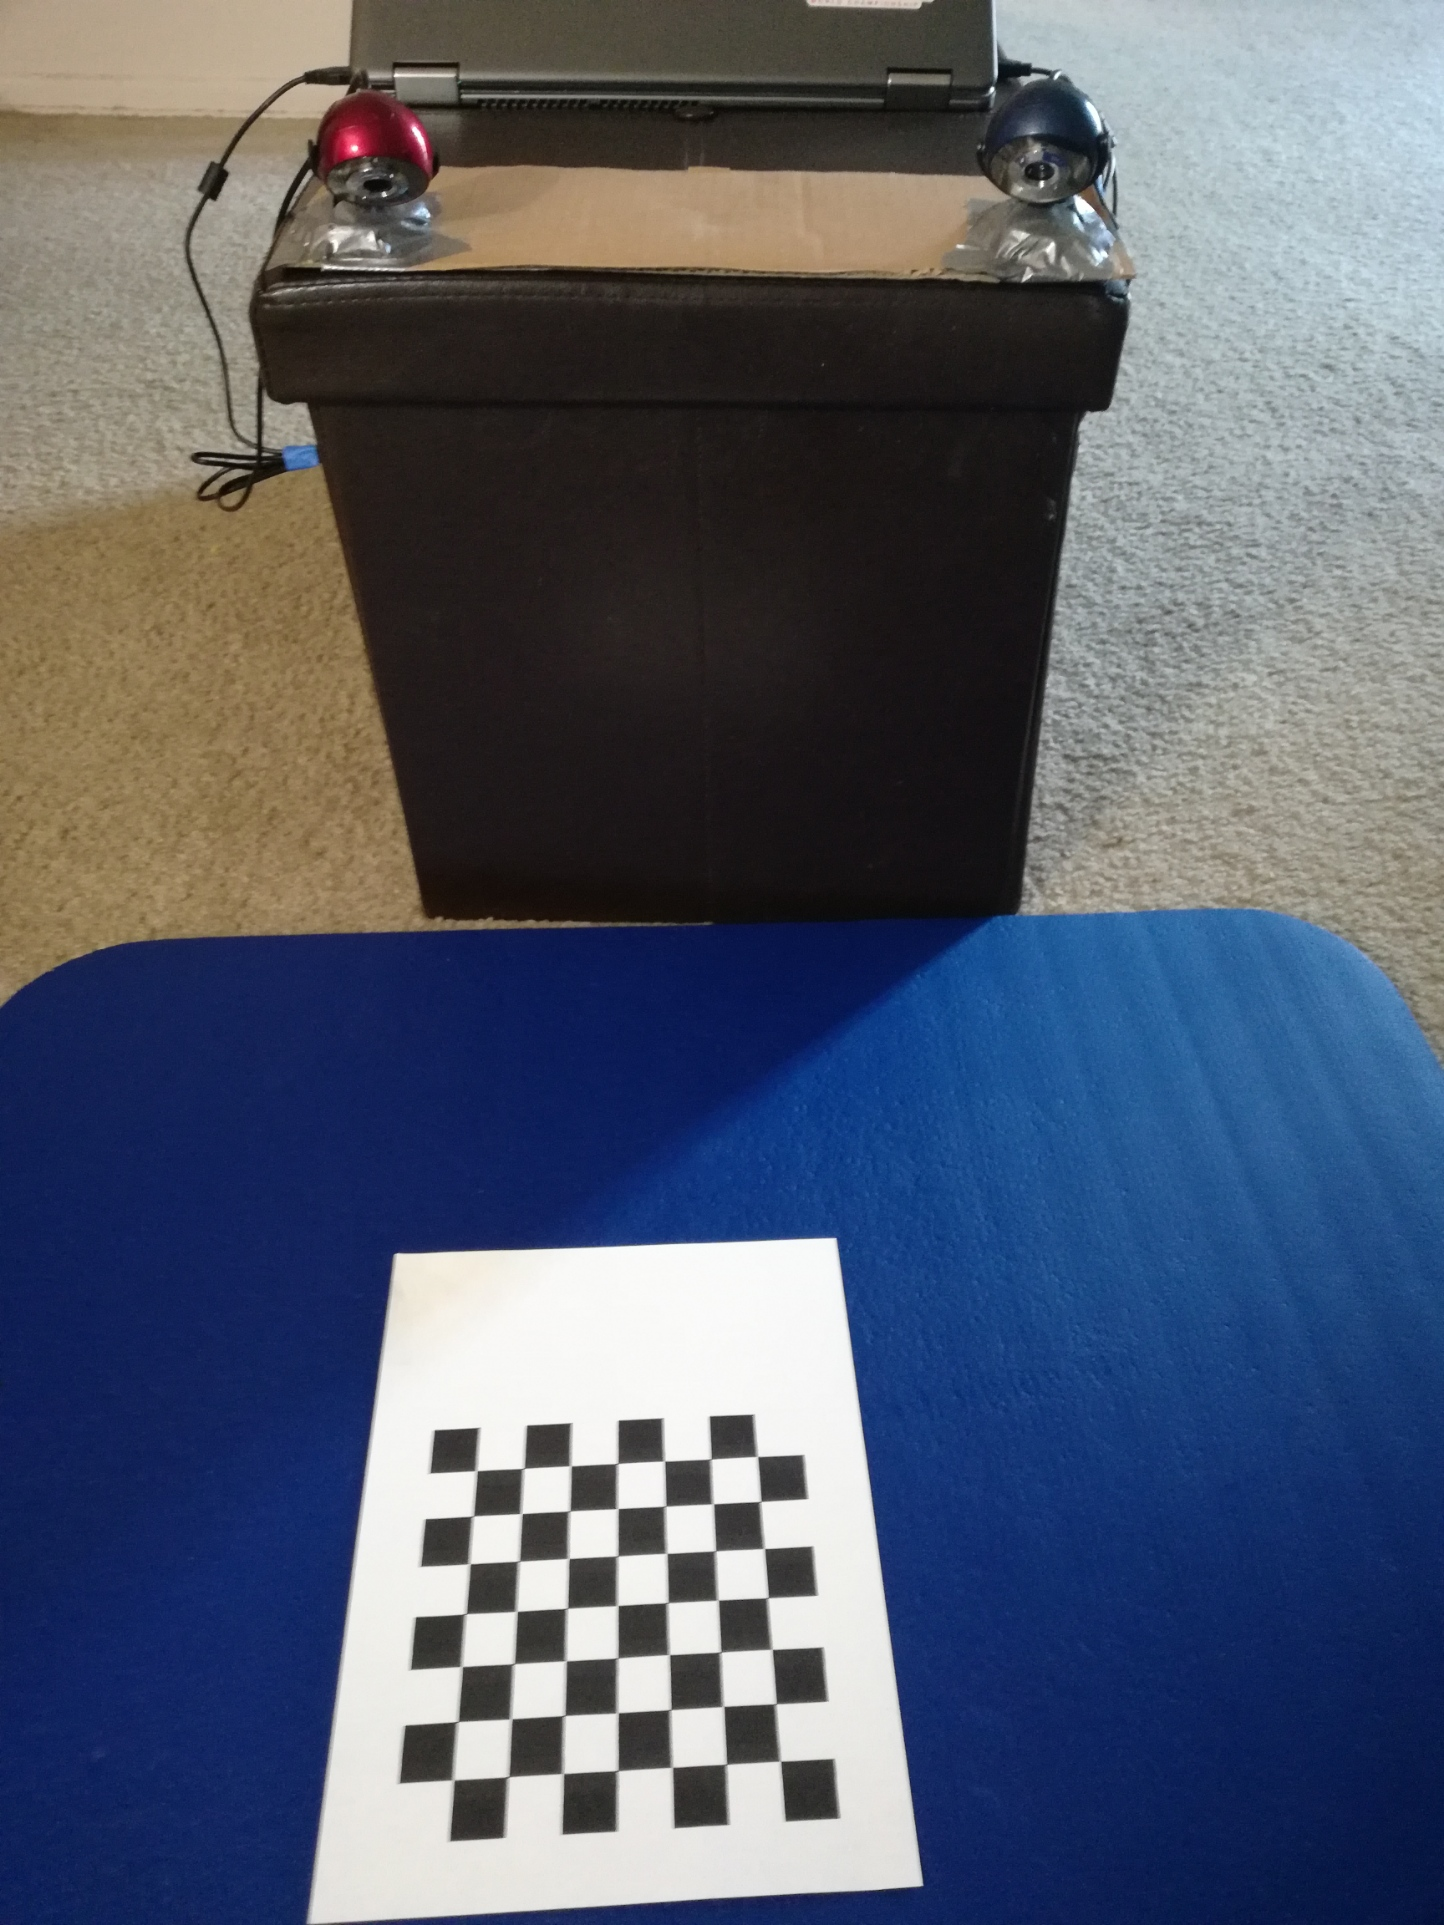

(720, 1280)


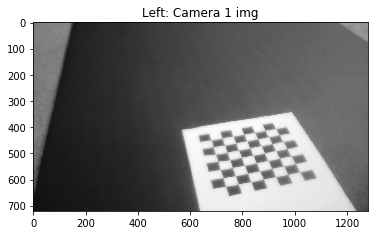

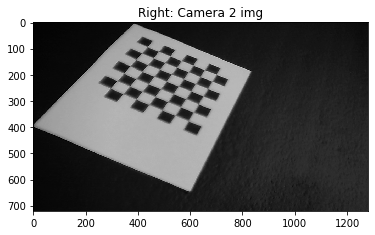

Homography matrix between camera 1 and 2, H: 
[[ 7.89135163e-01 -9.97092382e-01  3.48829225e+02]
 [ 5.38676949e-01  7.58962264e-01 -6.14861515e+02]
 [-1.08152124e-04  1.60749622e-04  1.00000000e+00]]


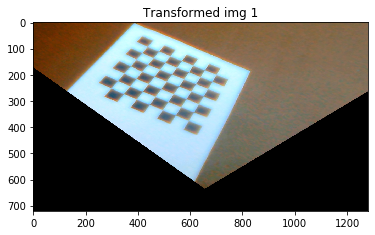

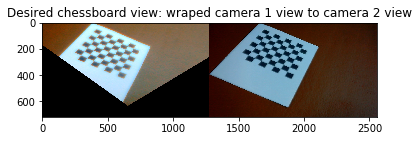

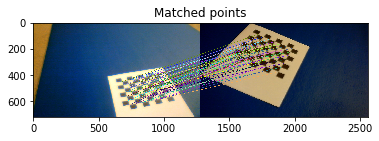

In [3]:


### Load chessboard img from two camera ###
## Left camera ##
img1 = cv2.imread(r'C:\Users\khan1\Desktop\Projective_transform\two_camera_homography\camera_setup_img\left_camera.jpg')
## right camera ##
img2 = cv2.imread(r'C:\Users\khan1\Desktop\Projective_transform\two_camera_homography\camera_setup_img\right_camera.jpg')

# plt.imshow(img1)
# plt.title("Camera 1 img")
# plt.show()

# plt.imshow(img2)
# plt.title("Camera 2 img")
# plt.show()

grey1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
grey2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
print(grey1.shape)

plt.imshow(cv2.cvtColor(grey1, cv2.COLOR_BGR2RGB))
plt.title("Left: Camera 1 img")
plt.show()

plt.imshow(cv2.cvtColor(grey2, cv2.COLOR_BGR2RGB))
plt.title("Right: Camera 2 img")
plt.show()


### find corners for each img ###
ret1, corners1 = cv2.findChessboardCorners(grey1, (7,7), None) # change (9,6) value based on  checkerboard image
ret2, corners2 = cv2.findChessboardCorners(grey2, (7,7), None)

# print("img 1 corners")
#print(ret1, corners1)
# print("img 2 corners")
# print(ret2, corners2)


### Estimate homography ###
H, status = cv2.findHomography(corners1, corners2)
print("Homography matrix between camera 1 and 2, H: ")
print(H)


# [warp-chessboard]
img1_warp = cv2.warpPerspective(img1, H, (img1.shape[1], img1.shape[0]))
# [warp-chessboard]
plt.imshow(img1_warp)
plt.title("Transformed img 1")
plt.show()



img_draw_warp = cv2.hconcat([img1_warp,img2])
plt.imshow(img_draw_warp)
plt.title("Desired chessboard view: wraped camera 1 view to camera 2 view")
plt.show()


### Show which points matched
corners1 = corners1.tolist()
corners1 = [a[0] for a in corners1]
#print(corners1)


#original points in img 2
corners2 = corners2.tolist()
corners2 = [a[0] for a in corners2]
# print("original points in img 2")
# print(corners2)

reproject_points = []
# [compute-transformed-corners]
img_draw_matches = cv2.hconcat([img1, img2])
for i in range(len(corners1)):
    pt1 = np.array([corners1[i][0], corners1[i][1], 1])
    #print(pt1)
    pt1 = pt1.reshape(3, 1)
    pt2 = np.dot(H, pt1)
    pt2 = pt2/pt2[2]
    reproject_points.append(pt2)

    end = (int(img1.shape[1] + pt2[0]), int(pt2[1]))
    COLORS = (np.random.randint(0,255), np.random.randint(0,255), np.random.randint(0,255))
    cv2.line(img_draw_matches, tuple([int(j) for j in corners1[i]]), end, COLORS, 2)

# print(reproject_points)
plt.imshow(cv2.cvtColor(img_draw_matches, cv2.COLOR_BGR2RGB))
plt.title("Matched points")
plt.show()

### How can you tell if a homography matrix is acceptable or not?
### Calculate reprojection error estimation


Calculate area (in pixel) of the checkerboard:  
trapizoid area: 1/2 *(a + b) * h
[760. 190.]
371.20614219056233
435.4595273960601
288.0433995077825
271.01660465735307
area of checkerboard in pixels:  112743


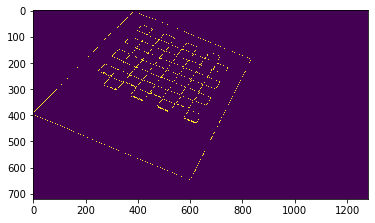

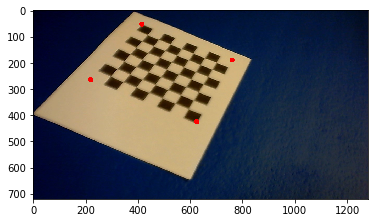

In [4]:
import math

print("Calculate area (in pixel) of the checkerboard:  ")
right_cam = cv2.imread(r'C:\Users\khan1\Desktop\Projective_transform\two_camera_homography\camera_setup_img\right_camera.jpg')

pts = np.float32([[415,53],[760,190],[220,265],[625,425]])

print("trapizoid area: 1/2 *(a + b) * h")
print(pts[1])

a = math.hypot(pts[0][0] - pts[1][0], pts[0][1] - pts[1][1])
print(a)
b = math.hypot(pts[2][0] - pts[3][0], pts[2][1] - pts[3][1])
print(b)

h1 = math.hypot(pts[0][0] - pts[2][0], pts[0][1] - pts[2][1])
print(h1)
h2 = math.hypot(pts[1][0] - pts[3][0], pts[1][1] - pts[3][1])
print(h2)
avg_h = 0.5 * (h1 + h2)

area_board = int(0.5 * (a + b) * avg_h)
print("area of checkerboard in pixels: ",area_board)


gray = cv2.cvtColor(right_cam, cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray, (7, 7), 0)
# perform edge detection, then perform a dilation + erosion to
# close gaps in between object edges
edged = cv2.Canny(gray, 50, 100)
edged = cv2.dilate(edged, None, iterations=1)
edged = cv2.erode(edged, None, iterations=1)
# find contours in the edge map
plt.imshow(edged)
plt.show()

# cnts = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
# print(len(cnts))

# cnts = cnts[0]
# # loop over the contours individually
# for c in cnts:
#     # if the contour is not sufficiently large, ignore it
#     if cv2.contourArea(c) < 100:
#         continue
#     # compute the rotated bounding box of the contour
#     orig = right_cam.copy()
#     box = cv2.minAreaRect(c)
#     box = cv2.boxPoints(box)
#     box = np.array(box, dtype="int")
#     # order the points in the contour such that they appear
#     # in top-left, top-right, bottom-right, and bottom-left
#     # order, then draw the outline of the rotated bounding
#     # box
#     #box = perspective.order_points(box)
#     cv2.drawContours(orig, [box.astype("int")], -1, (0, 255, 0), 2)
#     # loop over the original points and draw them
#     for (x, y) in box:
#         cv2.circle(orig, (int(x), int(y)), 5, (0, 0, 255), -1)

# plt.imshow(cv2.cvtColor(orig, cv2.COLOR_BGR2RGB))
# plt.title("Box contour")
# plt.show()


draw_points(right_cam,pts,radius = 10)

In [5]:

print(" [corners2] contains the original checkerboard [pix_x,pix_y] position for img2")
#print("original points in img 2")
# print(np.shape(corners2))
# print(corners2[1])

print(" [reproject_points] contains the projected checkerboard corners [pix_x,pix_y] position for img1")
print("[reproject_points] = H * [corners1]")
print("[reproject_points] should be equal to corners 2")
#print("reprojected img 1 points")
# print(np.shape(reproject_points))
# print(reproject_points[1])

"""
How to calculate error in homography?
1. Take the points of one image and reproject them using the computed homography.
2. Calculate the euclidean distance between the reprojected points and the real points in the image.
3. Establish a threshold that decides if the reprojection error is acceptable.
"""

# x_axis_error = np.square(corners2[1][0] - reproject_points[1][0])
# y_axis_error = np.square(corners2[1][1] - reproject_points[1][1])
# print("x_axis_sq_error ",x_axis_error)
# print("y_axis_sq_error",y_axis_error)

# sq_error_sum = x_axis_error + y_axis_error
# error = np.sqrt(sq_error_sum) 
# print("sqrt error or euclidean distance btn two points", error)

## Establish a treshold that decides if the reprojection error is acceptable.
## For example, an error greater than one pixel (error > 1) for each set of points
## we have 49 points, so sum_error < 49 is acceptable

total_error = 0
for i in range(len(corners2)):
    
    x_axis_error = np.square(corners2[i][0] - reproject_points[i][0])
    y_axis_error = np.square(corners2[i][1] - reproject_points[i][1])
    sq_error_sum = x_axis_error + y_axis_error
    error = np.sqrt(sq_error_sum) 
    #print("error for point ",i,"is ",error, "pixel")
    total_error = total_error + error

print("Total error in pixels", total_error)
print("Divide total_error with checker board area to get percentage error")
print("error percentage: ",100 * total_error/area_board,"%")
print("Total error in pixels/total corners (pixel/corner): ", total_error/len(corners2))

 [corners2] contains the original checkerboard [pix_x,pix_y] position for img2
 [reproject_points] contains the projected checkerboard corners [pix_x,pix_y] position for img1
[reproject_points] = H * [corners1]
[reproject_points] should be equal to corners 2
Total error in pixels [64.39543177]
Divide total_error with checker board area to get percentage error
error percentage:  [0.05711701] %
Total error in pixels/total corners (pixel/corner):  [1.31419249]


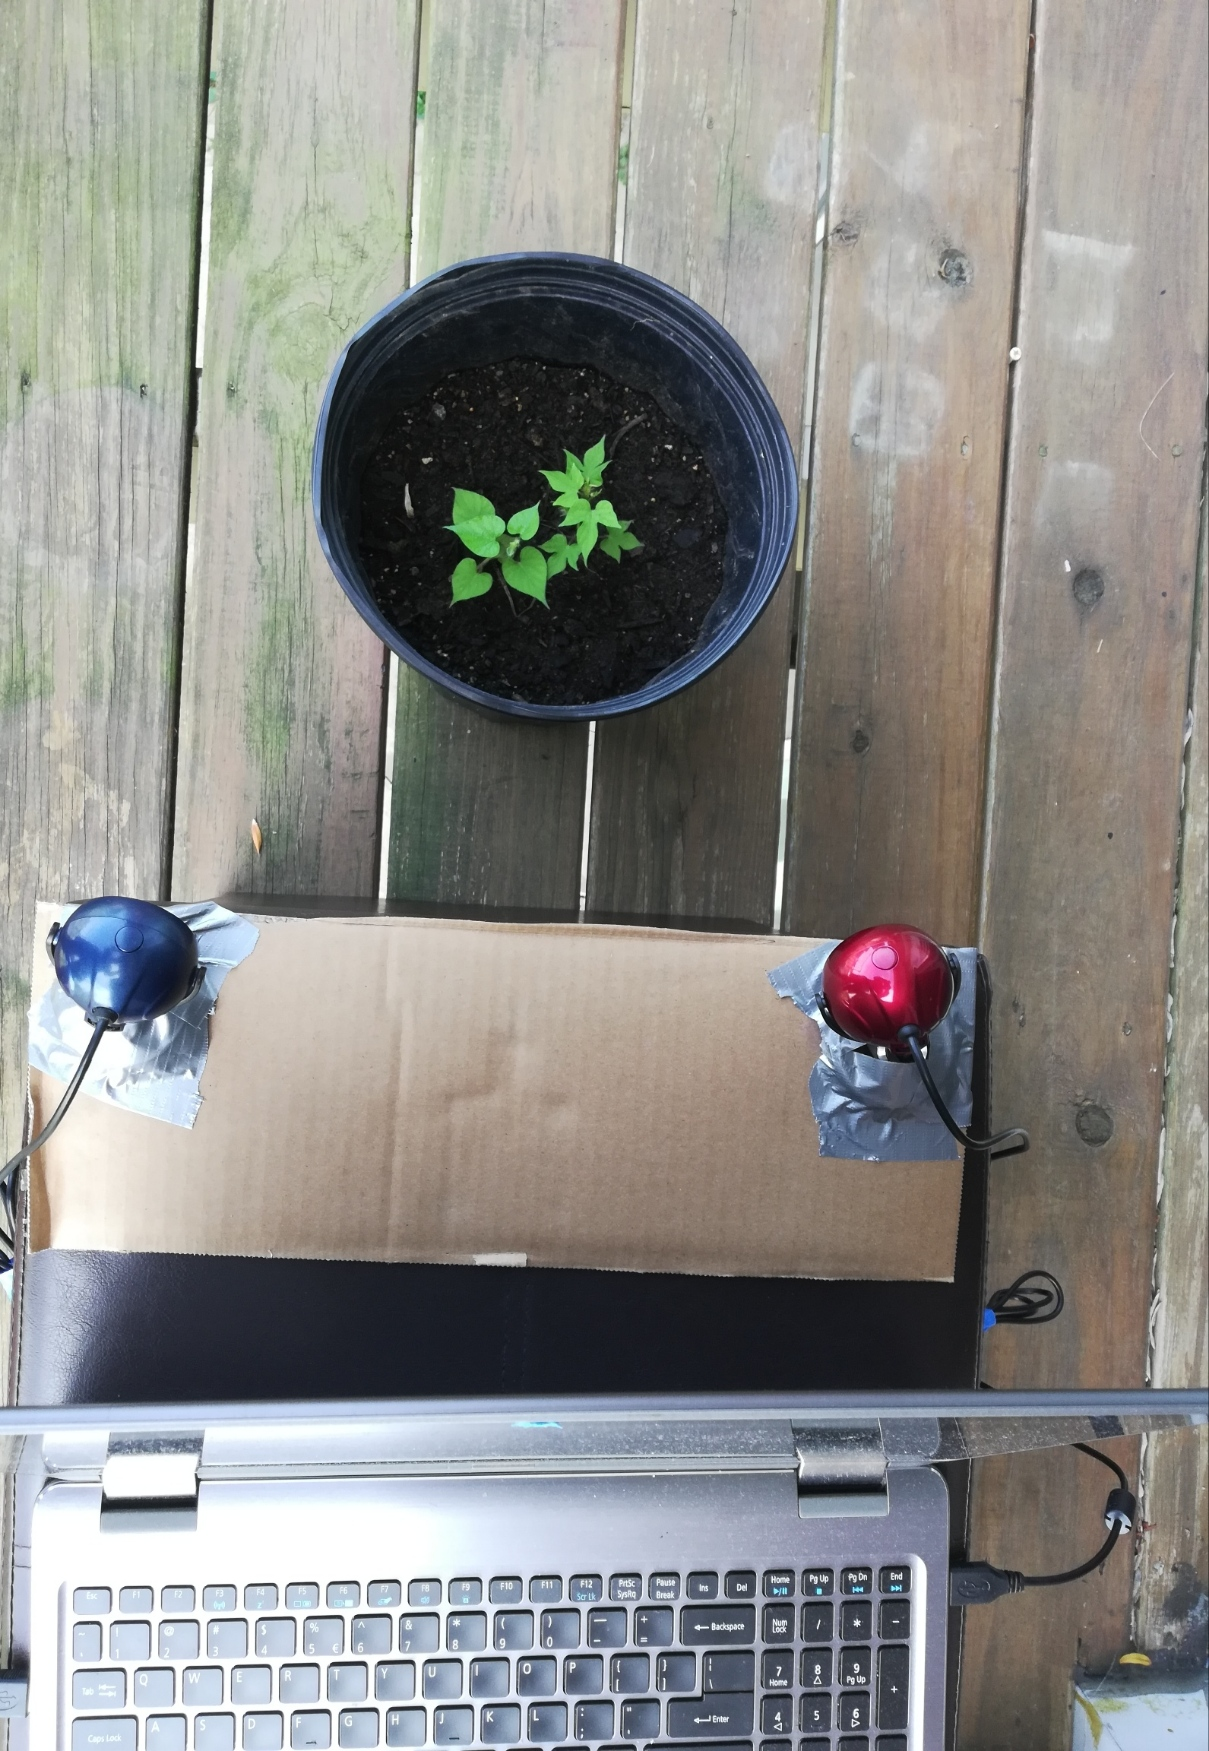

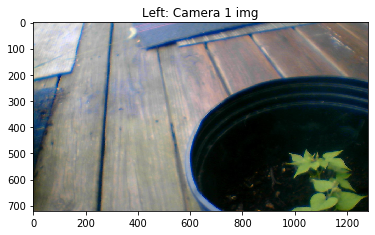

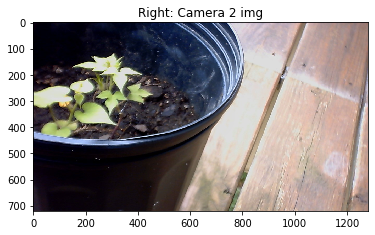

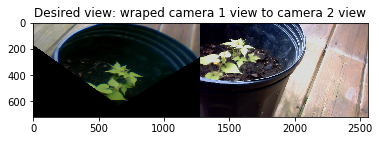

In [6]:
### Use camera homography matrix to superimpose weed image ###

### Load weed image ###
## Left camera ##
img1_weed = cv2.imread(r'C:\Users\khan1\Desktop\Projective_transform\two_camera_homography\camera_weed_img\left_cam_ragweed.jpg')
## right camera ##
img2_weed = cv2.imread(r'C:\Users\khan1\Desktop\Projective_transform\two_camera_homography\camera_weed_img\right_cam_ragweed.jpg')

plt.imshow(cv2.cvtColor(img1_weed, cv2.COLOR_BGR2RGB))
plt.title("Left: Camera 1 img")
plt.show()

plt.imshow(cv2.cvtColor(img2_weed, cv2.COLOR_BGR2RGB))
plt.title("Right: Camera 2 img")
plt.show()


### Homography matrix is same from checkerboard image because camera position is same ###
H_cam = H

# [warp-camera-img]
img1_weed_warp = cv2.warpPerspective(img1_weed, H, (img1_weed.shape[1], img1_weed.shape[0]))
img1_weed_warp = cv2.cvtColor(img1_weed_warp, cv2.COLOR_BGR2RGB)


img_draw_warp = cv2.hconcat([img1_weed_warp,cv2.cvtColor(img2_weed, cv2.COLOR_BGR2RGB)])
plt.imshow(img_draw_warp)
plt.title("Desired view: wraped camera 1 view to camera 2 view")
plt.show()


In [7]:
###  *** This is using SIFT to find corner points to calculate H ***
###  *** This can be implemented for any kind of images (not only chessboard) taken from two view ***
###  *** OpenCV-contrib is needed to acess SIFT/SURF ***


# import numpy as np
# import cv2

# def findHomography(img1, img2):

#     # define constants
#     MIN_MATCH_COUNT = 10
#     MIN_DIST_THRESHOLD = 0.7
#     RANSAC_REPROJ_THRESHOLD = 5.0

#     # Initiate SIFT detector
#     sift = cv2.xfeatures2d.SIFT_create()

#     # find the keypoints and descriptors with SIFT
#     kp1, des1 = sift.detectAndCompute(img1, None)
#     kp2, des2 = sift.detectAndCompute(img2, None)

#     # find matches
#     FLANN_INDEX_KDTREE = 1
#     index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
#     search_params = dict(checks=50)

#     flann = cv2.FlannBasedMatcher(index_params, search_params)
#     matches = flann.knnMatch(des1, des2, k=2)

#     # store all the good matches as per Lowe's ratio test.
#     good = []
#     for m, n in matches:
#         if m.distance < MIN_DIST_THRESHOLD * n.distance:
#             good.append(m)


#     if len(good) > MIN_MATCH_COUNT:
#         src_pts = np.float32([kp1[m.queryIdx].pt for m in good]).reshape(-1, 1, 2)
#         dst_pts = np.float32([kp2[m.trainIdx].pt for m in good]).reshape(-1, 1, 2)

#         H, _ = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, RANSAC_REPROJ_THRESHOLD)
#         return H

#     else: raise Exception("Not enough matches are found - {}/{}".format(len(good), MIN_MATCH_COUNT))
        
# H_sift = findHomography(img1,img2)
# print(H_sift)

(720, 1280)


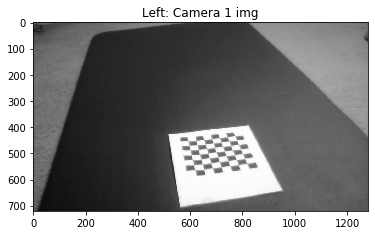

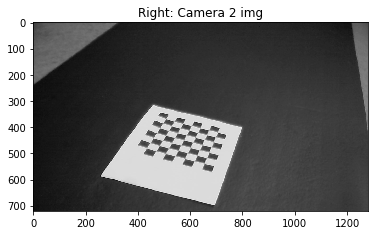

Homography matrix between camera 1 and 2, H: 
[[ 8.01595148e-01 -8.23802539e-01  3.59074397e+02]
 [ 2.86053473e-01  8.23846699e-01 -2.12334604e+02]
 [-1.51519765e-04 -1.56795389e-05  1.00000000e+00]]


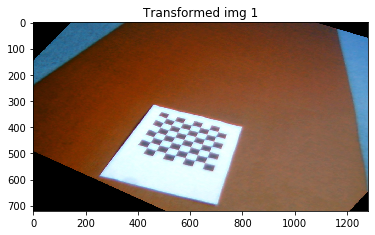

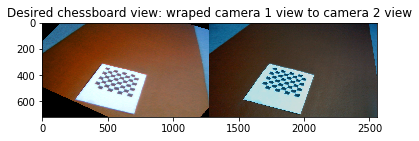

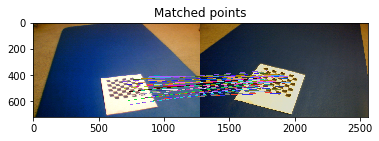

In [31]:
### Load chessboard img from two camera ###
## Left camera ##
imgL = cv2.imread(r'C:\Users\khan1\Desktop\Projective_transform\two_camera_homography\checkerboard_high\l.jpg')
## right camera ##
imgR = cv2.imread(r'C:\Users\khan1\Desktop\Projective_transform\two_camera_homography\checkerboard_high\r.jpg')

# plt.imshow(img1)
# plt.title("Camera 1 img")
# plt.show()

# plt.imshow(img2)
# plt.title("Camera 2 img")
# plt.show()

greyL = cv2.cvtColor(imgL, cv2.COLOR_BGR2GRAY)
greyR = cv2.cvtColor(imgR, cv2.COLOR_BGR2GRAY)
print(greyL.shape)

plt.imshow(cv2.cvtColor(greyL, cv2.COLOR_BGR2RGB))
plt.title("Left: Camera 1 img")
plt.show()

plt.imshow(cv2.cvtColor(greyR, cv2.COLOR_BGR2RGB))
plt.title("Right: Camera 2 img")
plt.show()


### find corners for each img ###
retL, cornersL = cv2.findChessboardCorners(greyL, (7,7), None) # change (9,6) value based on  checkerboard image
retR, cornersR = cv2.findChessboardCorners(greyR, (7,7), None)

# print("img 1 corners")
#print(ret1, corners1)
# print("img 2 corners")
# print(ret2, corners2)


### Estimate homography ###
H, status = cv2.findHomography(cornersL, cornersR)
print("Homography matrix between camera 1 and 2, H: ")
print(H)


# [warp-chessboard]
imgL_warp = cv2.warpPerspective(imgL, H, (imgL.shape[1], imgL.shape[0]))
# [warp-chessboard]
plt.imshow(imgL_warp)
plt.title("Transformed img 1")
plt.show()



img_draw_warp = cv2.hconcat([imgL_warp,imgR])
plt.imshow(img_draw_warp)
plt.title("Desired chessboard view: wraped camera 1 view to camera 2 view")
plt.show()


### Show which points matched
cornersL = cornersL.tolist()
cornersL = [a[0] for a in cornersL]
#print(corners1)


#original points in img 2
cornersR = cornersR.tolist()
cornersR = [a[0] for a in cornersR]
# print("original points in img 2")
# print(corners2)

reproject_points = []
# [compute-transformed-corners]
img_draw_matches = cv2.hconcat([imgL, imgR])
for i in range(len(cornersL)):
    pt1 = np.array([cornersL[i][0], cornersL[i][1], 1])
    #print(pt1)
    pt1 = pt1.reshape(3, 1)
    pt2 = np.dot(H, pt1)
    pt2 = pt2/pt2[2]
    reproject_points.append(pt2)

    end = (int(imgL.shape[1] + pt2[0]), int(pt2[1]))
    COLORS = (np.random.randint(0,255), np.random.randint(0,255), np.random.randint(0,255))
    cv2.line(img_draw_matches, tuple([int(j) for j in corners1[i]]), end, COLORS, 2)

# print(reproject_points)
plt.imshow(cv2.cvtColor(img_draw_matches, cv2.COLOR_BGR2RGB))
plt.title("Matched points")
plt.show()

height 720 width 1280


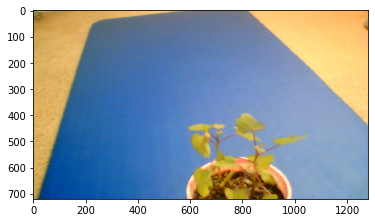

Left Camera BB ::


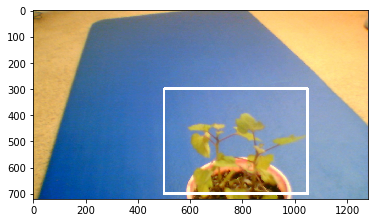

height 720 width 1280


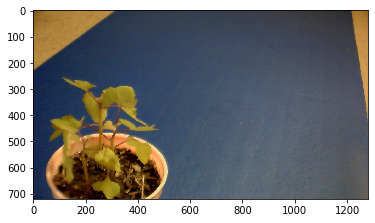

Right Camera BB ::


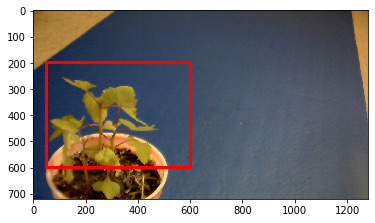

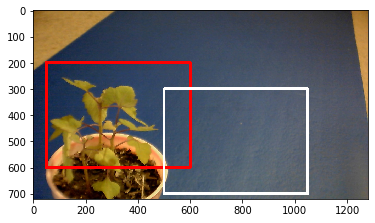

[[ 8.01595148e-01 -8.23802539e-01  3.59074397e+02]
 [ 2.86053473e-01  8.23846699e-01 -2.12334604e+02]
 [-1.51519765e-04 -1.56795389e-05  1.00000000e+00]]


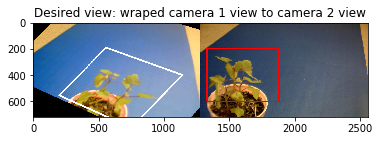

How openCV draws BB based on projective point


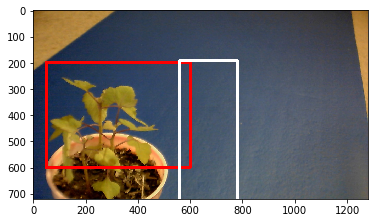

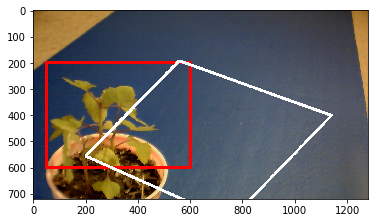

In [62]:
## Draw BB over weed img ###
#Load original image, in real case it will video frame
img_leftcam = cv2.imread(r'C:\Users\khan1\Desktop\Projective_transform\two_camera_homography\weed_high\left_coc_close.jpg')
height = img_leftcam.shape[0]
width = img_leftcam.shape[1]
print("height",height,"width",width)
plt.imshow(cv2.cvtColor(img_leftcam, cv2.COLOR_BGR2RGB))
plt.show()

print("Left Camera BB ::")
clone_leftcam = img_leftcam.copy()
LstartX, LstartY = 500,300
LendX, LendY = 1050,700
cv2.rectangle(clone_leftcam, (LstartX, LstartY), (LendX, LendY),(255, 255, 255), 10)
plt.imshow(cv2.cvtColor(clone_leftcam, cv2.COLOR_BGR2RGB))
plt.show()


## Right cam 
img_rightcam = cv2.imread(r'C:\Users\khan1\Desktop\Projective_transform\two_camera_homography\weed_high\right_coc_close.jpg')
height = img_rightcam.shape[0]
width = img_rightcam.shape[1]
print("height",height,"width",width)
plt.imshow(cv2.cvtColor(img_rightcam, cv2.COLOR_BGR2RGB))
plt.show()

print("Right Camera BB ::")
clone_rightcam = img_rightcam.copy()
RstartX, RstartY = 50,200
RendX, RendY = 600,600
cv2.rectangle(clone_rightcam, (RstartX, RstartY), (RendX, RendY),(0, 0, 255), 10)
#cv2.rectangle(clone_rightcam, (LstartX, LstartY), (LendX, LendY),(255, 255, 255), 10)
plt.imshow(cv2.cvtColor(clone_rightcam, cv2.COLOR_BGR2RGB))
plt.show()

## plot 2 BB ##
copy_rightcam = clone_rightcam.copy()
cv2.rectangle(copy_rightcam, (LstartX, LstartY), (LendX, LendY),(255, 255, 255), 10)
plt.imshow(cv2.cvtColor(copy_rightcam, cv2.COLOR_BGR2RGB))
plt.show()

### Homography matrix is same from checkerboard image because camera position is same ###
H_cam = H
print(H_cam)

# # [warp-chessboard]
# imgL_warp = cv2.warpPerspective(imgL, H, (imgL.shape[1], imgL.shape[0]))
# # [warp-chessboard]
# plt.imshow(imgL_warp)
# plt.title("Transformed img 1")
# plt.show()

# [warp-camera-img]
leftcam_warp = cv2.warpPerspective(clone_leftcam, H_cam, (img_leftcam.shape[1], img_leftcam.shape[0]))
leftcam_warp = cv2.cvtColor(leftcam_warp, cv2.COLOR_BGR2RGB)
# plt.imshow(cv2.cvtColor(leftcam_warp, cv2.COLOR_BGR2RGB))
# plt.show()



img_draw_warp = cv2.hconcat([leftcam_warp,cv2.cvtColor(clone_rightcam, cv2.COLOR_BGR2RGB)])
plt.imshow(img_draw_warp)
plt.title("Desired view: wraped camera 1 view to camera 2 view")
plt.show()

## plot proj BB ##
print("How openCV draws BB based on projective point")
copy_rightcam = clone_rightcam.copy()
cv2.rectangle(copy_rightcam, (558, 193), (782, 801),(255, 255, 255), 10)
plt.imshow(cv2.cvtColor(copy_rightcam, cv2.COLOR_BGR2RGB))
plt.show()


## plot proj BB ##
copy_rightcam = clone_rightcam.copy()
pts = np.array([[558, 193], [201, 556],  
                [752, 801], [1140, 401]], 
               np.int32) 
  
pts = pts.reshape((-1, 1, 2)) 
isClosed = True
copy_rightcam = cv2.polylines(copy_rightcam, [pts],isClosed, (255, 255, 255), 10) 
plt.imshow(cv2.cvtColor(copy_rightcam, cv2.COLOR_BGR2RGB))
plt.show()

In [60]:
## For left image ##
print("BB points after projection")

print("Top left:")
point_start = np.array([500,300,1])
new_point_start = np.matmul(H_cam,point_start)
new_point_start_norm = np.around(new_point_start/new_point_start[2])
print(new_point_start_norm )

print("Top right:")
point_start = np.array([1050,300,1])
new_point_start = np.matmul(H_cam,point_start)
new_point_start_norm = np.around(new_point_start/new_point_start[2])
print(new_point_start_norm )

print("Bottom left:")
point_start = np.array([500,700,1])
new_point_start = np.matmul(H_cam,point_start)
new_point_start_norm = np.around(new_point_start/new_point_start[2])
print(new_point_start_norm )

print("bottom right")
point_end = np.array([1050,700,1])
new_point_end = np.matmul(H_cam,point_end)
new_point_end_norm = np.around(new_point_end/new_point_end[2])
print(new_point_end_norm )

BB points after projection
Top left:
[558. 193.   1.]
Top right:
[1.14e+03 4.01e+02 1.00e+00]
Bottom left:
[201. 556.   1.]
bottom right
[752. 801.   1.]


In [45]:
def bb_intersection_over_union(boxA, boxB):
    # determine the (x, y)-coordinates of the intersection rectangle
    boxA = [a / 100. for a in boxA]
    boxB = [b / 100. for b in boxB]
    
    xA = max(boxA[0], boxB[0])
    yA = max(boxA[1], boxB[1])
    xB = min(boxA[2], boxB[2])
    yB = min(boxA[3], boxB[3])

    # compute the area of intersection rectangle
    interArea = abs(max((xB - xA, 0)) * max((yB - yA), 0))
    if interArea == 0:
        return 0
    # compute the area of both the prediction and ground-truth
    # rectangles
    boxAArea = abs((boxA[2] - boxA[0]) * (boxA[3] - boxA[1]))
    boxBArea = abs((boxB[2] - boxB[0]) * (boxB[3] - boxB[1]))

    # compute the intersection over union by taking the intersection
    # area and dividing it by the sum of prediction + ground-truth
    # areas - the interesection area
    iou = interArea / float(boxAArea + boxBArea - interArea)

    # return the intersection over union value
    return iou

In [63]:
### Calculate IOU ###
print("Before Transformation::")
leftcam_bb = [500,300,1050,700]
rightcam_bb = [50,200,600,600]
iou_before_project = bb_intersection_over_union(leftcam_bb,rightcam_bb)
print("IoU",iou_before_project)

### IoU function calculates assuming rectangular BB
### But after projection BB is not rectangular but parallelogram
### Have to figure  out how to calc ioU for this
print("After Transformation::")
leftcam_proj_bb = [558, 193,752, 801]
rightcam_bb = [50,200,600,600]
print("this is incorrect")
iou_after_project = bb_intersection_over_union(leftcam_proj_bb,rightcam_bb)
print("IoU",iou_after_project)

Before Transformation::
IoU 0.07317073170731707
After Transformation::
this is incorrect
IoU 0.05231167795934635


### Load BB image and superimpose

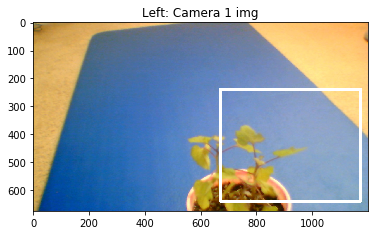

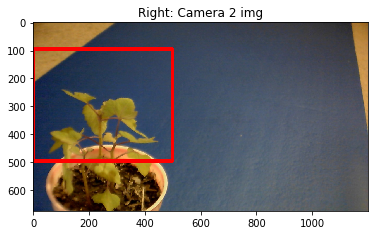

(675, 1200, 3)


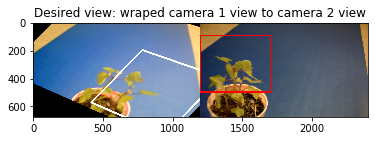

In [19]:
### Load weed image ###
## Left camera ##
img1_weed = cv2.imread(r'C:\Users\khan1\Desktop\Projective_transform\two_camera_homography\weed_high\left_coc_close_BB.png')
## right camera ##
img2_weed = cv2.imread(r'C:\Users\khan1\Desktop\Projective_transform\two_camera_homography\weed_high\right_coc_close_BB.png')

plt.imshow(cv2.cvtColor(img1_weed, cv2.COLOR_BGR2RGB))
plt.title("Left: Camera 1 img")
plt.show()

plt.imshow(cv2.cvtColor(img2_weed, cv2.COLOR_BGR2RGB))
plt.title("Right: Camera 2 img")
plt.show()
print(img2_weed.shape)

"""Current size is different than orig size
current 675X1200
orig 720X1280
Check if that affect when IOU calculated from BB corner points
"""

### Homography matrix is same from checkerboard image because camera position is same ###
H_cam = H

# [warp-camera-img]
img1_weed_warp = cv2.warpPerspective(img1_weed, H_cam, (img1_weed.shape[1], img1_weed.shape[0]))
img1_weed_warp = cv2.cvtColor(img1_weed_warp, cv2.COLOR_BGR2RGB)


img_draw_warp = cv2.hconcat([img1_weed_warp,cv2.cvtColor(img2_weed, cv2.COLOR_BGR2RGB)])
plt.imshow(img_draw_warp)
plt.title("Desired view: wraped camera 1 view to camera 2 view")
plt.show()
